In [1]:
import os
import datascout as ds
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import glob 

In [2]:
# Plotting parameters
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.ion()

plt.close('all')

In [3]:
path2files = './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/'
files_list = sorted(glob.glob(path2files+'*PM1*'))

print(files_list)
files2ignore_list = []

['./SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.24.40.935000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.24.40.935000_SPS.BWS.51637.H-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.25.45.735000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.26.50.535000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.27.12.135000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.27.33.735000_SPS.BWS.51637.H-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.31.52.935000_SPS.BWS.51637.H-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.50.14.535000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_2

In [4]:
# find best choice between PM1 and PM2
emitX_list, emitY_list, daysX_list, daysY_list  = [], [], [], []

for filename in files_list:
    if filename not in files2ignore_list:
        
        data = ds.parquet_to_awkward(filename) # type: awkward.highlevel.Array
        #print(data.fields) # print the keys of the wkward array

        acq = data['cycleStamp'][0]/1e9+ data[f'acq_time_Set1'][0]/1e6 # sec
        t_corr = 2*3600

        if '51637.H' in filename:
            emitX_list.append(data['emittance_Set1'][0][0])
            daysX_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
        if '41677.V' in filename:
            emitY_list.append(data['emittance_Set1'][0][0])
            daysY_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
    else:
        print(f'file {filename} ignored')

In [37]:
# find best choice between PM1 and PM2
emitX_list, emitY_list, daysX_list, daysY_list  = [], [], [], []

for filename in files_list:
    if filename not in files2ignore_list:
        
        data = ds.parquet_to_awkward(filename) # type: awkward.highlevel.Array
        #print(data.fields) # print the keys of the wkward array

        acq = data['cycleStamp'][0]/1e9+ data[f'acq_time_Set1'][0]/1e6 # sec
        t_corr = 2*3600

        if '51637.H' in filename:
            emitX_list.append(data['emittance_Set1'][0][0])
            daysX_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
        if '41677.V' in filename:
            emitY_list.append(data['emittance_Set1'][0][0])
            daysY_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
    else:
        print(f'file {filename} ignored')

Slope H: 3.5161143561967406e-05
Intercept : -25.95060814650697
Slope V: 1.2266757500195408e-05
Intercept : -9.053453268521181


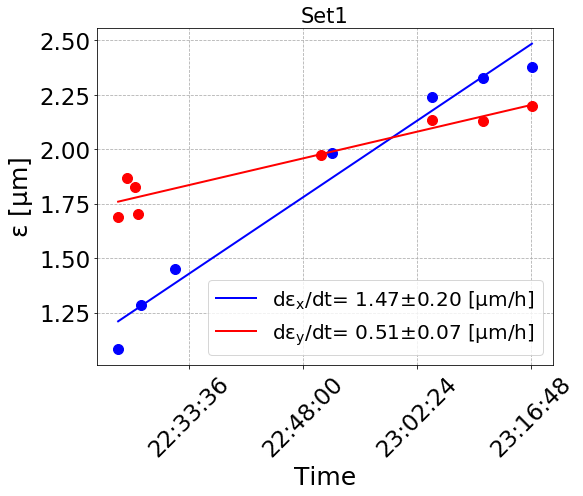

In [38]:
# compute the emit grwoth in m/day
[mX, bX], covX = np.polyfit(daysX_list, emitX_list, deg=1, cov=True)
[mY, bY], covY = np.polyfit(daysY_list, emitY_list, deg=1, cov=True)

errX = np.sqrt(np.diag(covX))[0]
errY = np.sqrt(np.diag(covY))[0]

print ("Slope H: " + str(mX))
print ("Intercept : " + str(bX))

print ("Slope V: " + str(mY))
print ("Intercept : " + str(bY))

fig, ax = plt.subplots(1)

xfmt = md.DateFormatter('%H:%M:%S')

ax.plot(daysX_list, np.array(emitX_list)*1e6, 'o', c='b')
ax.plot(daysY_list, np.array(emitY_list)*1e6, 'o', c='r')

ax.plot(daysX_list, (np.array(daysX_list)*mX+bX)*1e6, c='b', label=r'$\mathrm{d\epsilon_x/dt}$'+f'= {mX*1e6/24:.2f}'+r'$\pm$'+f'{errX*1e6/24:.2f} '+r'$\mathrm{[\mu m/h]}$')
ax.plot(daysY_list, (np.array(daysY_list)*mY+bY)*1e6, c='r', label=r'$\mathrm{d\epsilon_y/dt}$'+f'= {mY*1e6/24:.2f}'+r'$\pm$'+f'{errY*1e6/24:.2f} '+r'$\mathrm{[\mu m/h]}$')

ax.set_title(f'{my_set}')
ax.set_xlabel('Time')
ax.set_ylabel(r'$\mathrm{\epsilon \ [\mu m]}$')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.gca().xaxis.set_major_formatter(xfmt)
plt.grid(ls='--')
plt.tight_layout()

plt.savefig(f'emit_vs_time_{my_set}.png', bbox_inches='tight')

#plt.show()


